In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

# Make plots larger
plt.rcParams['figure.figsize'] = (15, 9)
from __future__ import print_function
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
import warnings

warnings.filterwarnings('ignore')

In [60]:
data_xls = pd.read_csv('green_tripdata_2018-01.csv')
data_xls

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2018-01-01 00:18:50,2018-01-01 00:24:39,N,1,236,236,5,0.70,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2,1.0
1,2,2018-01-01 00:30:26,2018-01-01 00:46:42,N,1,43,42,5,3.50,14.5,0.5,0.5,0.00,0.0,NaN,0.3,15.80,2,1.0
2,2,2018-01-01 00:07:25,2018-01-01 00:19:45,N,1,74,152,1,2.14,10.0,0.5,0.5,0.00,0.0,NaN,0.3,11.30,2,1.0
3,2,2018-01-01 00:32:40,2018-01-01 00:33:41,N,1,255,255,1,0.03,-3.0,-0.5,-0.5,0.00,0.0,NaN,-0.3,-4.30,3,1.0
4,2,2018-01-01 00:32:40,2018-01-01 00:33:41,N,1,255,255,1,0.03,3.0,0.5,0.5,0.00,0.0,NaN,0.3,4.30,2,1.0
5,2,2018-01-01 00:38:35,2018-01-01 01:08:50,N,1,255,161,1,5.63,21.0,0.5,0.5,0.00,0.0,NaN,0.3,22.30,2,1.0
6,2,2018-01-01 00:18:41,2018-01-01 00:28:22,N,1,189,65,5,1.71,8.5,0.5,0.5,0.00,0.0,NaN,0.3,9.80,2,1.0
7,2,2018-01-01 00:38:02,2018-01-01 00:55:02,N,1,189,225,5,3.45,14.5,0.5,0.5,3.16,0.0,NaN,0.3,18.96,1,1.0
8,2,2018-01-01 00:05:02,2018-01-01 00:18:35,N,1,129,82,1,1.61,10.0,0.5,0.5,0.00,0.0,NaN,0.3,11.30,2,1.0
9,2,2018-01-01 00:35:23,2018-01-01 00:42:07,N,1,226,7,1,1.87,7.5,0.5,0.5,0.00,0.0,NaN,0.3,8.80,2,1.0


In [61]:
data_xls.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2018-01-01 00:18:50,2018-01-01 00:24:39,N,1,236,236,5,0.70,6.0,0.5,0.5,0.0,0.0,NaN,0.3,7.3,2,1.0
1,2,2018-01-01 00:30:26,2018-01-01 00:46:42,N,1,43,42,5,3.50,14.5,0.5,0.5,0.0,0.0,NaN,0.3,15.8,2,1.0
2,2,2018-01-01 00:07:25,2018-01-01 00:19:45,N,1,74,152,1,2.14,10.0,0.5,0.5,0.0,0.0,NaN,0.3,11.3,2,1.0
3,2,2018-01-01 00:32:40,2018-01-01 00:33:41,N,1,255,255,1,0.03,-3.0,-0.5,-0.5,0.0,0.0,NaN,-0.3,-4.3,3,1.0
4,2,2018-01-01 00:32:40,2018-01-01 00:33:41,N,1,255,255,1,0.03,3.0,0.5,0.5,0.0,0.0,NaN,0.3,4.3,2,1.0


In [5]:
data_xls.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
count,793529.000000,793529.000000,793529.000000,793529.000000,793529.000000,793529.000000,793529.000000,793529.000000,793529.000000,793529.000000,793529.000000,0.0,793529.000000,793529.000000,793529.000000,793526.000000
mean,1.826479,1.074520,110.042243,128.640492,1.362568,2.665767,11.735637,0.339561,0.487992,1.036160,0.085211,NaN,0.293034,14.004577,1.475495,1.018199
std,0.378697,0.565088,74.427252,77.165897,1.046734,2.845330,10.165305,0.395055,0.083866,1.894866,1.021389,NaN,0.049651,11.090961,0.521846,0.133669
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-183.000000,-4.500000,-0.500000,-2.720000,0.000000,NaN,-0.300000,-183.000000,1.000000,1.000000
25%,2.000000,1.000000,49.000000,61.000000,1.000000,0.990000,6.000000,0.000000,0.500000,0.000000,0.000000,NaN,0.300000,7.800000,1.000000,1.000000
50%,2.000000,1.000000,82.000000,129.000000,1.000000,1.700000,9.000000,0.000000,0.500000,0.000000,0.000000,NaN,0.300000,10.800000,1.000000,1.000000
75%,2.000000,1.000000,166.000000,193.000000,1.000000,3.270000,14.000000,0.500000,0.500000,1.760000,0.000000,NaN,0.300000,16.800000,2.000000,1.000000
max,2.000000,99.000000,265.000000,265.000000,9.000000,140.620000,2126.000000,4.500000,0.500000,295.000000,557.550000,NaN,0.300000,2126.800000,5.000000,2.000000


In [6]:
data_xls.info

<bound method DataFrame.info of         VendorID lpep_pickup_datetime lpep_dropoff_datetime  \
0              2  2018-01-01 00:18:50   2018-01-01 00:24:39   
1              2  2018-01-01 00:30:26   2018-01-01 00:46:42   
2              2  2018-01-01 00:07:25   2018-01-01 00:19:45   
3              2  2018-01-01 00:32:40   2018-01-01 00:33:41   
4              2  2018-01-01 00:32:40   2018-01-01 00:33:41   
5              2  2018-01-01 00:38:35   2018-01-01 01:08:50   
6              2  2018-01-01 00:18:41   2018-01-01 00:28:22   
7              2  2018-01-01 00:38:02   2018-01-01 00:55:02   
8              2  2018-01-01 00:05:02   2018-01-01 00:18:35   
9              2  2018-01-01 00:35:23   2018-01-01 00:42:07   
10             2  2018-01-01 00:21:00   2018-01-01 00:39:04   
11             2  2018-01-01 00:56:29   2018-01-01 01:04:44   
12             2  2018-01-01 00:11:48   2018-01-01 00:30:13   
13             2  2018-01-01 00:57:59   2018-01-01 01:12:26   
14             2  2018-

In [7]:
data_xls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793529 entries, 0 to 793528
Data columns (total 19 columns):
VendorID                 793529 non-null int64
lpep_pickup_datetime     793529 non-null object
lpep_dropoff_datetime    793529 non-null object
store_and_fwd_flag       793529 non-null object
RatecodeID               793529 non-null int64
PULocationID             793529 non-null int64
DOLocationID             793529 non-null int64
passenger_count          793529 non-null int64
trip_distance            793529 non-null float64
fare_amount              793529 non-null float64
extra                    793529 non-null float64
mta_tax                  793529 non-null float64
tip_amount               793529 non-null float64
tolls_amount             793529 non-null float64
ehail_fee                0 non-null float64
improvement_surcharge    793529 non-null float64
total_amount             793529 non-null float64
payment_type             793529 non-null int64
trip_type                79

In [8]:
data_xls.isnull().sum()

VendorID                      0
lpep_pickup_datetime          0
lpep_dropoff_datetime         0
store_and_fwd_flag            0
RatecodeID                    0
PULocationID                  0
DOLocationID                  0
passenger_count               0
trip_distance                 0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
ehail_fee                793529
improvement_surcharge         0
total_amount                  0
payment_type                  0
trip_type                     3
dtype: int64

In [9]:
data_xls.shape

(793529, 19)

In [10]:
data_xls.dtypes

VendorID                   int64
lpep_pickup_datetime      object
lpep_dropoff_datetime     object
store_and_fwd_flag        object
RatecodeID                 int64
PULocationID               int64
DOLocationID               int64
passenger_count            int64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
ehail_fee                float64
improvement_surcharge    float64
total_amount             float64
payment_type               int64
trip_type                float64
dtype: object

In [64]:
data_xls.drop('lpep_pickup_datetime', axis= 'columns', inplace=True)

In [12]:
data_xls.shape

(793529, 18)

In [65]:
data_xls.columns

Index(['VendorID', 'lpep_dropoff_datetime', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'passenger_count', 'trip_distance', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'ehail_fee',
       'improvement_surcharge', 'total_amount', 'payment_type', 'trip_type'],
      dtype='object')

In [66]:
data_xls.drop('lpep_dropoff_datetime', axis= 'columns', inplace=True)

In [15]:
data_xls.shape

(793529, 17)

In [67]:
data_xls.columns

Index(['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type'],
      dtype='object')

In [69]:
data_xls.drop('ehail_fee', axis= 'columns', inplace=True)

In [55]:
data_xls.shape

(793529, 15)

In [70]:
data_xls.columns

Index(['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type'],
      dtype='object')

In [62]:
data_xls.drop('store_and_fwd_flag', axis= 'columns', inplace=True)

In [63]:
data_xls.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count',
       'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'ehail_fee', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type'],
      dtype='object')

In [68]:
data_xls.ehail_fee.median()

nan

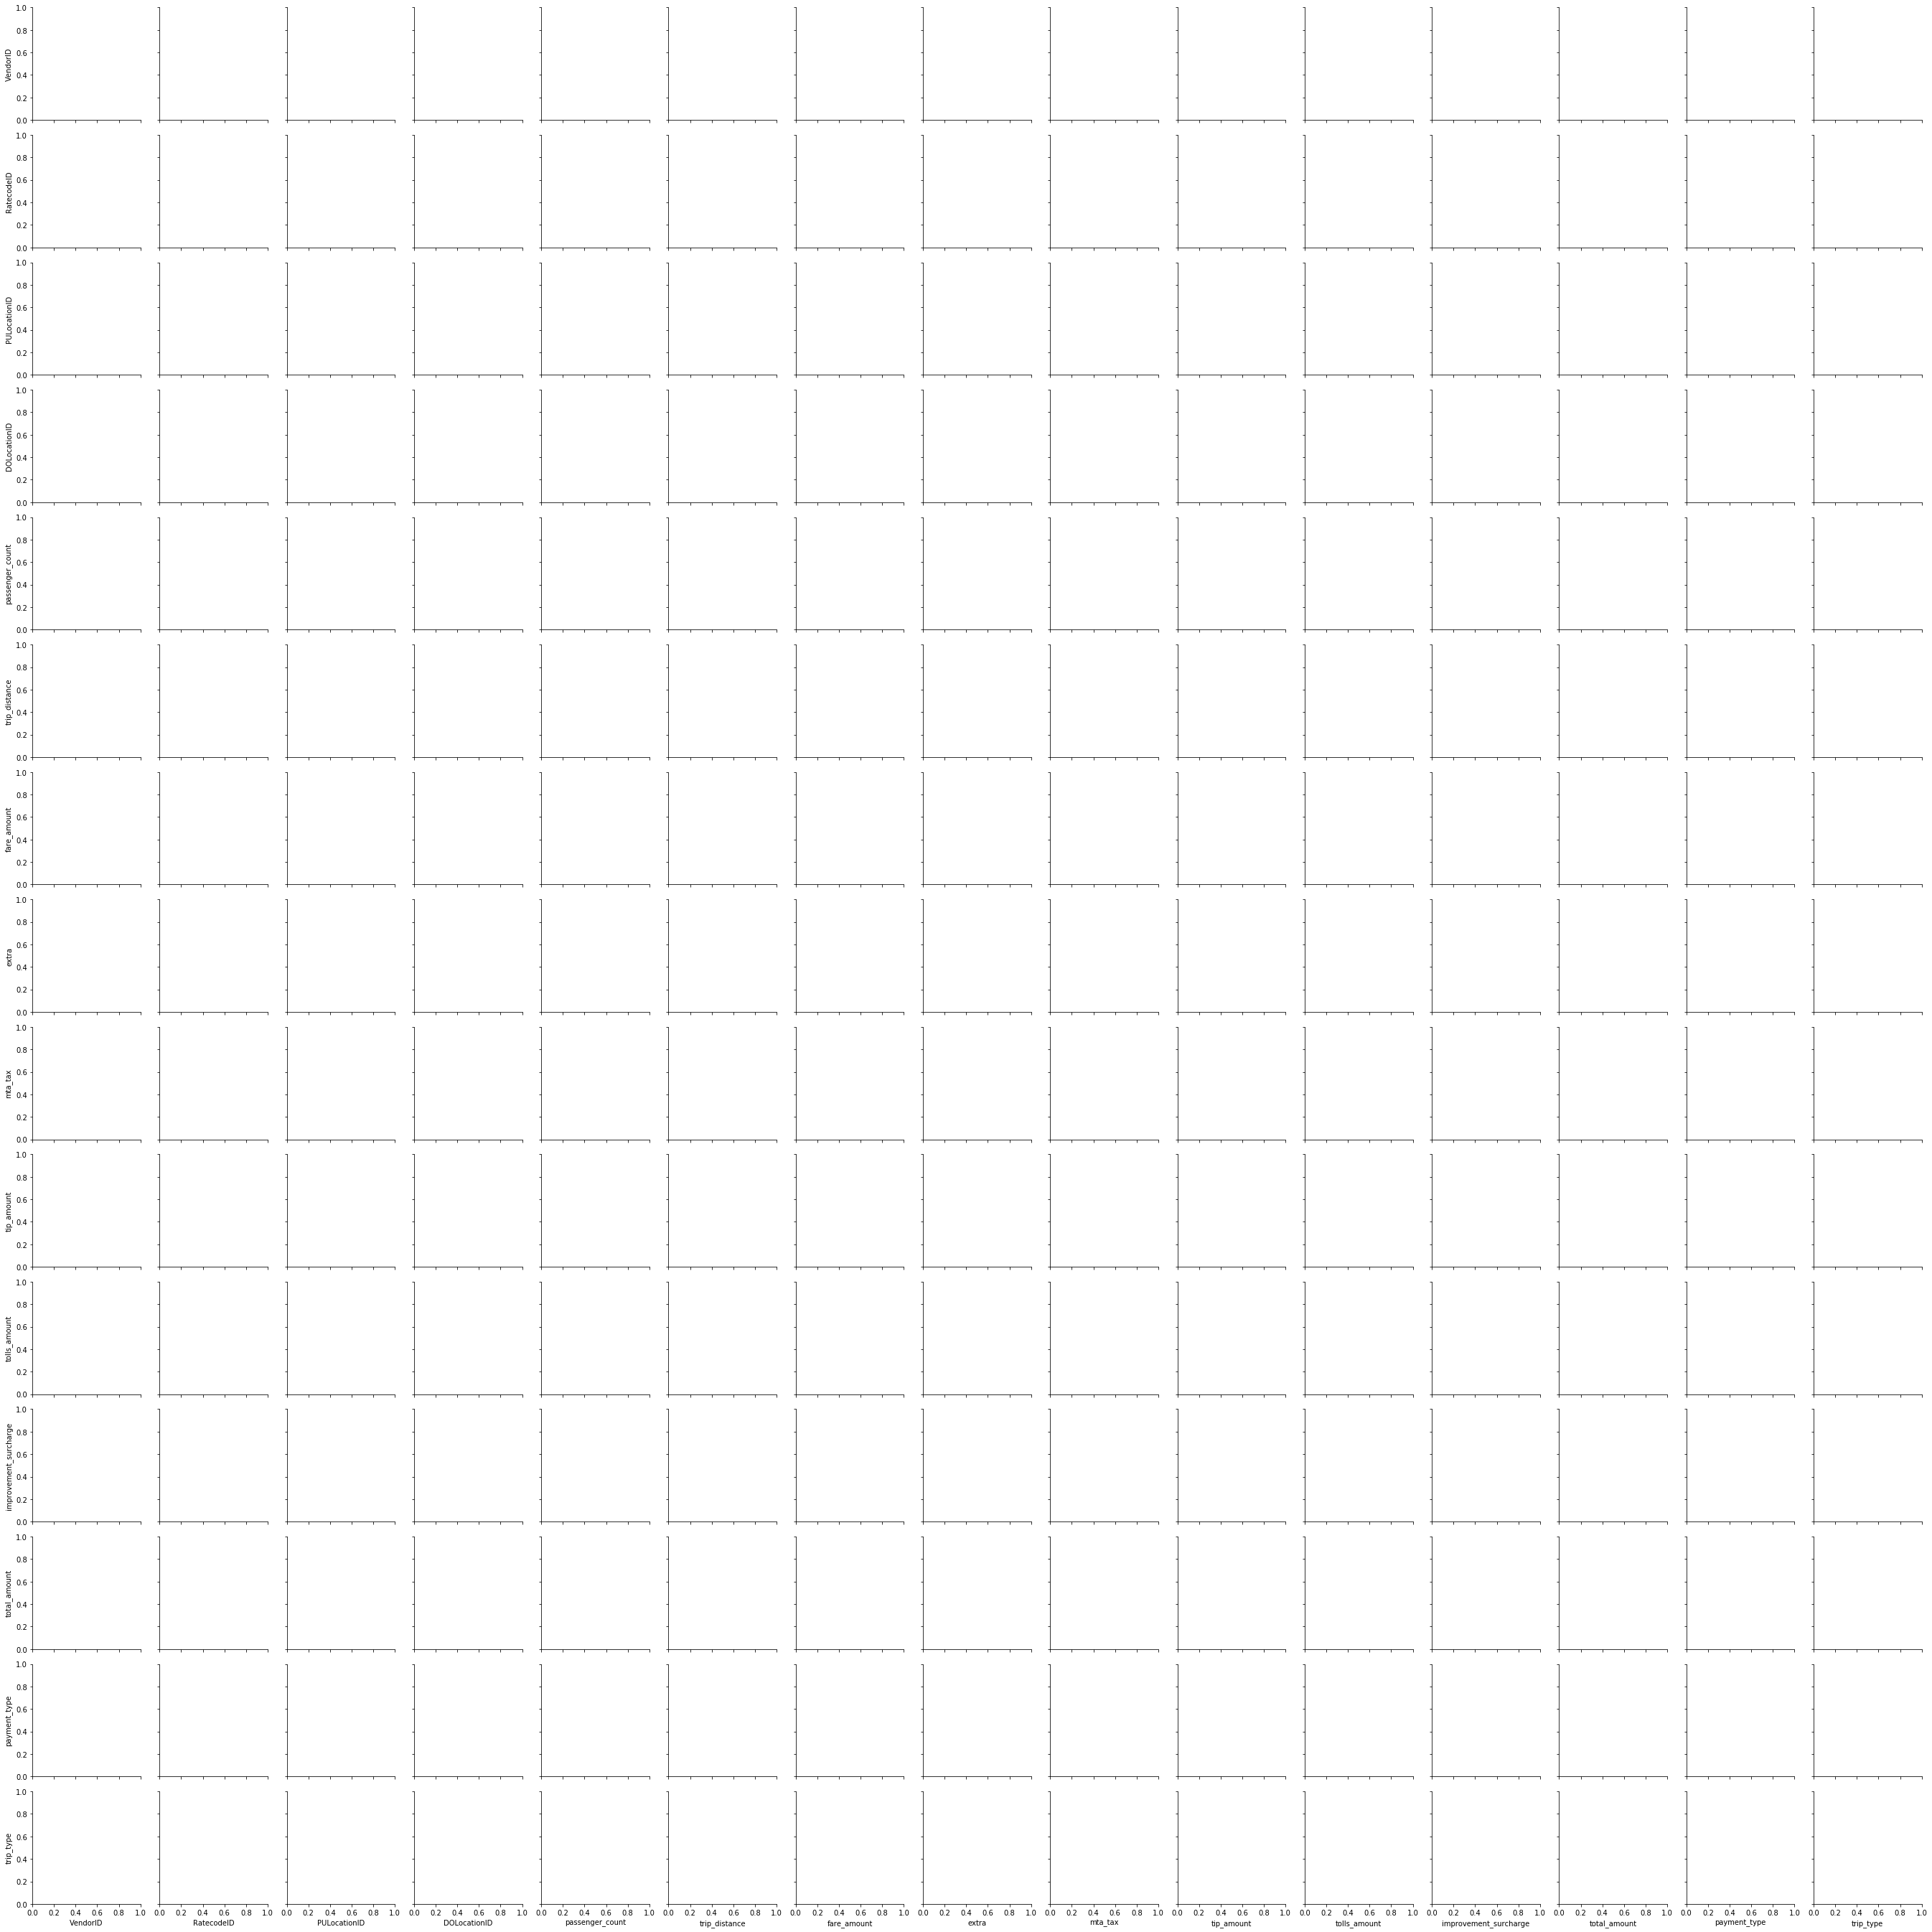

In [71]:
sns.PairGrid(data_xls)

In [47]:
df1 = data_xls.iloc[:,5:7]
#sns.PairGrid(df1)

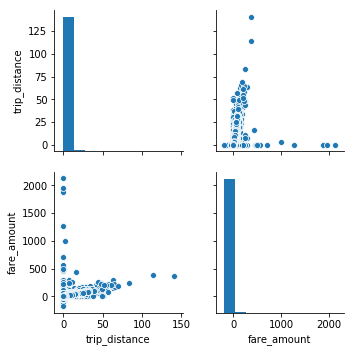

In [49]:
sns.pairplot(df1)

ValueError: max must be larger than min in range parameter.

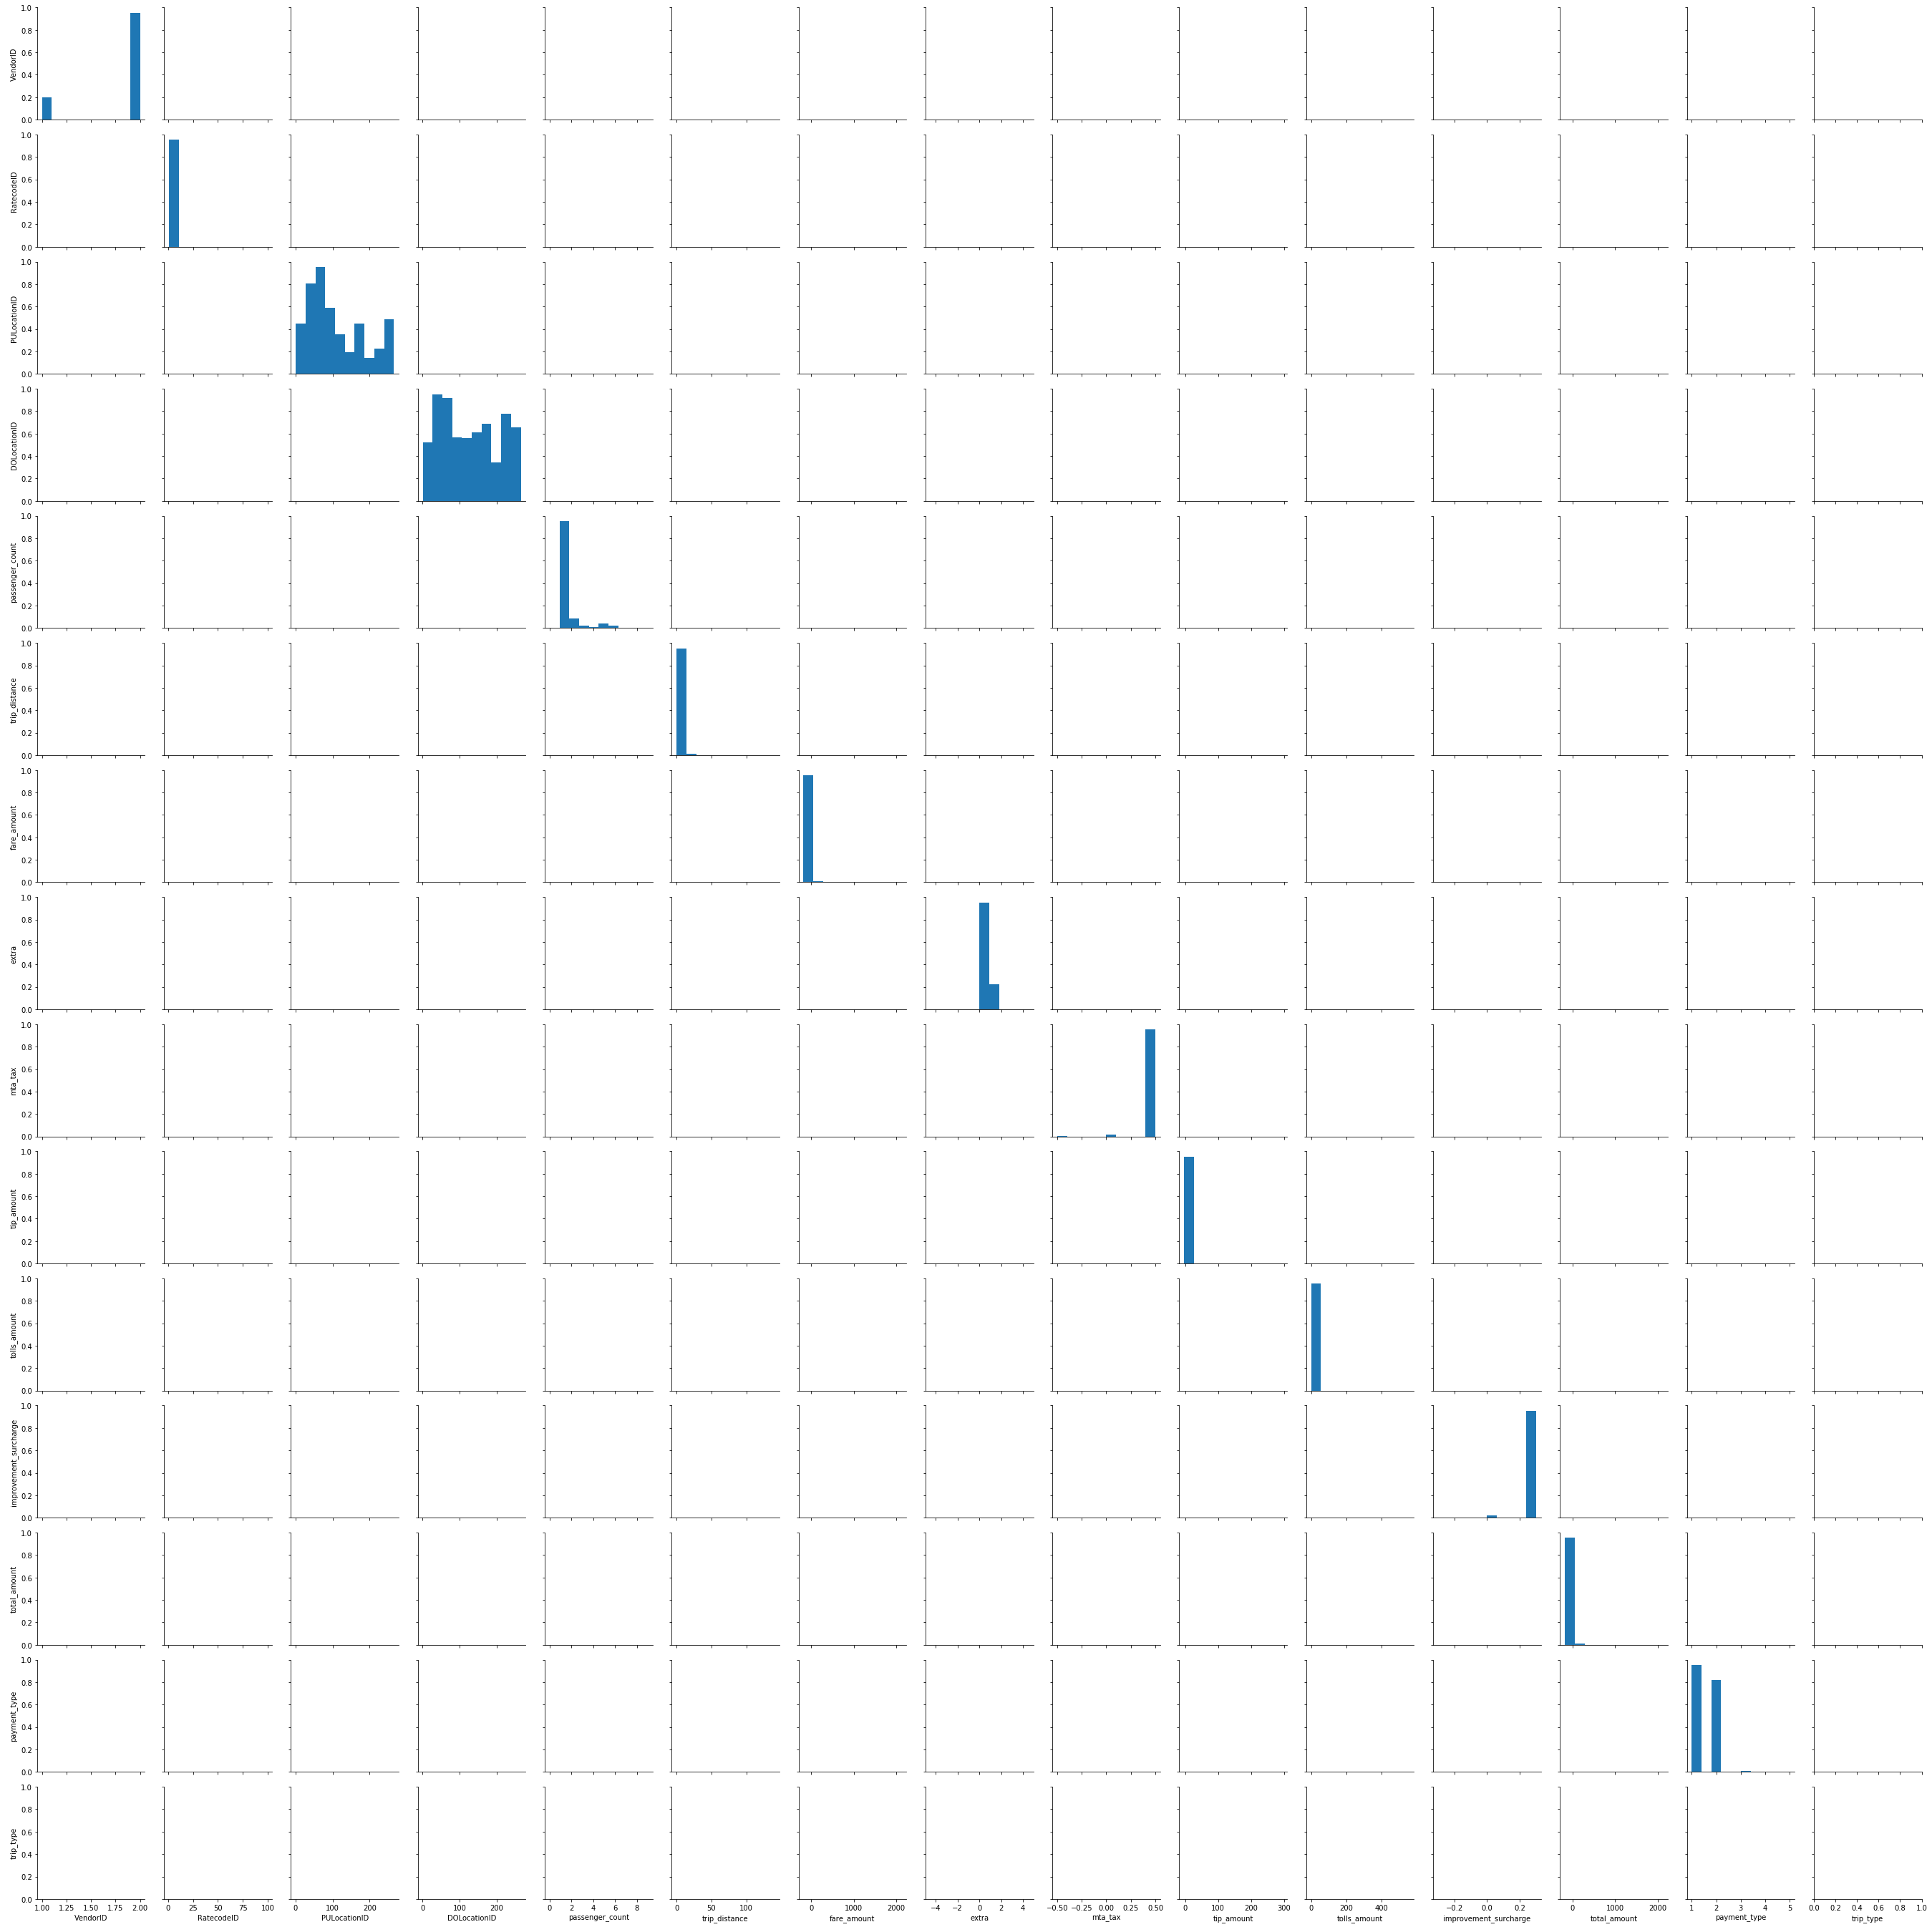

In [46]:
sns.pairplot(data_xls)

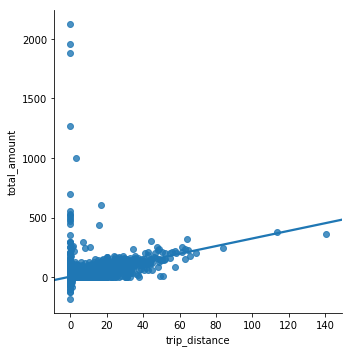

In [38]:
sns.lmplot(x="trip_distance", y="total_amount", data=data_xls, x_jitter=.05);

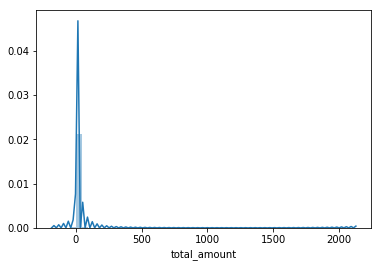

In [50]:
sns.distplot(data_xls['total_amount'])

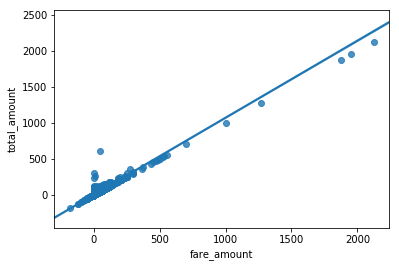

In [51]:
sns.regplot(x="fare_amount", y="total_amount", data=data_xls)

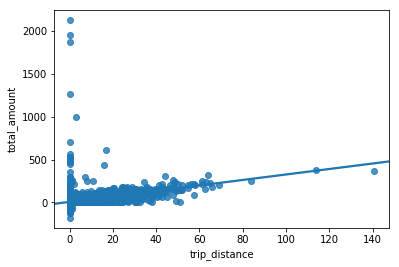

In [52]:
sns.regplot(x="trip_distance", y="total_amount", data=data_xls)

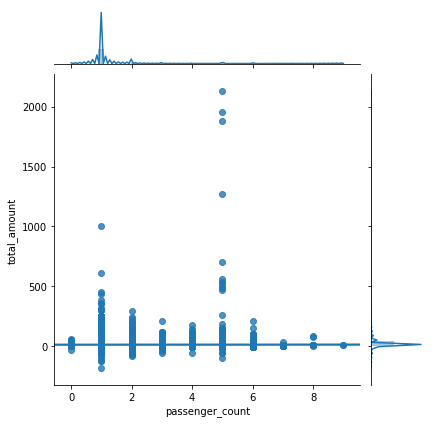

In [53]:
sns.jointplot(x="passenger_count", y="total_amount", data=data_xls, kind="reg")

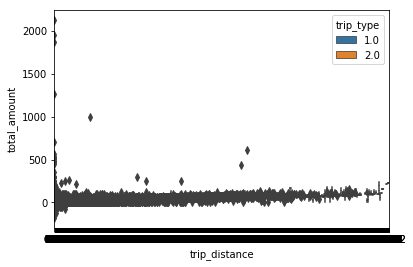

In [55]:
sns.boxplot(x="trip_distance", y="total_amount", hue="trip_type", data=data_xls)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000333A06D8>,
      dtype=object)

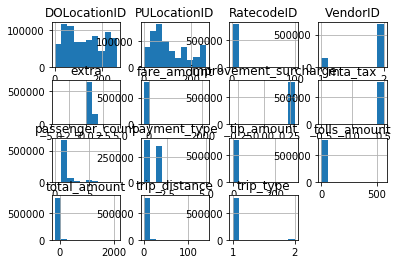

In [56]:
data_xls.hist()

In [ ]:
data_xls.groupby('total_amount').hist()

In [39]:
data_xls.corr()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
VendorID,1.000000,-0.018102,0.008401,-0.001251,0.092104,0.024449,0.031129,-0.006734,-0.002079,-0.029719,0.001479,-0.003082,0.024435,-0.054485,-0.012279
RatecodeID,-0.018102,1.000000,0.056043,0.023705,-0.008791,0.046228,0.094818,-0.104791,-0.724162,-0.001841,0.027089,-0.710358,0.076432,0.041722,0.937916
PULocationID,0.008401,0.056043,1.000000,0.160510,0.017459,0.054496,0.043526,0.016584,-0.050710,0.022731,0.018792,-0.050318,0.045705,-0.006944,0.057118
DOLocationID,-0.001251,0.023705,0.160510,1.000000,0.006421,0.081727,0.069612,-0.009111,-0.012839,0.072450,0.014161,-0.014187,0.077096,-0.037394,0.020263
passenger_count,0.092104,-0.008791,0.017459,0.006421,1.000000,0.003049,0.006089,0.008839,0.006808,0.003340,0.007132,0.006515,0.007450,0.000338,-0.010348
trip_distance,0.024449,0.046228,0.054496,0.081727,0.003049,1.000000,0.815736,-0.046510,0.000471,0.312807,0.226666,0.006901,0.821364,-0.138584,0.021619
fare_amount,0.031129,0.094818,0.043526,0.069612,0.006089,0.815736,1.000000,-0.043465,-0.013743,0.273192,0.182370,-0.004206,0.979254,-0.142761,0.067395
extra,-0.006734,-0.104791,0.016584,-0.009111,0.008839,-0.046510,-0.043465,1.000000,0.143144,0.027688,-0.011167,0.142657,0.000696,-0.013914,-0.111163
mta_tax,-0.002079,-0.724162,-0.050710,-0.012839,0.006808,0.000471,-0.013743,0.143144,1.000000,0.026651,-0.015454,0.983917,0.007933,-0.133973,-0.791048
tip_amount,-0.029719,-0.001841,0.022731,0.072450,0.003340,0.312807,0.273192,0.027688,0.026651,1.000000,0.129161,0.032437,0.436925,-0.498141,-0.018603


In [40]:
model = ols("total_amount ~ fare_amount -1", data=data_xls).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_amount   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 4.161e+07
Date:                Sun, 18 Nov 2018   Prob (F-statistic):               0.00
Time:                        15:27:08   Log-Likelihood:            -1.8350e+06
No. Observations:              793529   AIC:                         3.670e+06
Df Residuals:                  793528   BIC:                         3.670e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
fare_amount     1.1398      0.000   6450.631      0.000       1.139       1.140
==============================================================================
Omnibus:                  1686792.337   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     889227760786.708
Skew:                          16.905   Prob(JB):                         0.00
Kurtosis:                    5188.868   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
model = ols("total_amount ~ VendorID + RatecodeID + payment_type -1", data=data_xls).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_amount   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                 4.098e+05
Date:                Mon, 19 Nov 2018   Prob (F-statistic):               0.00
Time:                        12:41:08   Log-Likelihood:            -3.0423e+06
No. Observations:              793529   AIC:                         6.085e+06
Df Residuals:                  793526   BIC:                         6.085e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
VendorID         6.9846      0.019    368.001      0.000       6.947       7.022
RatecodeID       3.3293      0.021    157.135      0.000       3.288       3.371
payment_type    -1.9156      0.021    -91.314      0.000      -1.957      -1.875
==============================================================================
Omnibus:                  2007676.729   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     551341307138.993
Skew:                          26.983   Prob(JB):                         0.00
Kurtosis:                    4086.161   Cond. No.                         5.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
model = ols("total_amount ~ DOLocationID + mta_tax + trip_type-1", data=data_xls).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_amount   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                 4.302e+05
Date:                Mon, 19 Nov 2018   Prob (F-statistic):               0.00
Time:                        12:44:20   Log-Likelihood:            -3.0304e+06
No. Observations:              793526   AIC:                         6.061e+06
Df Residuals:                  793523   BIC:                         6.061e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
DOLocationID     0.0106      0.000     66.429      0.000       0.010       0.011
mta_tax          9.8620      0.090    109.016      0.000       9.685      10.039
trip_type        7.6990      0.045    172.527      0.000       7.612       7.786
==============================================================================
Omnibus:                  2049401.356   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     614087909561.956
Skew:                          28.494   Prob(JB):                         0.00
Kurtosis:                    4312.256   Cond. No.                     1.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
model = ols("total_amount ~ tip_amount + tolls_amount + trip_type -1", data=data_xls).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_amount   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                 6.365e+05
Date:                Mon, 19 Nov 2018   Prob (F-statistic):               0.00
Time:                        12:38:28   Log-Likelihood:            -2.9272e+06
No. Observations:              793526   AIC:                         5.855e+06
Df Residuals:                  793523   BIC:                         5.855e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
tip_amount       2.4334      0.006    422.417      0.000       2.422       2.445
tolls_amount     2.4724      0.011    230.462      0.000       2.451       2.493
trip_type       10.9561      0.012    911.933      0.000      10.933      10.980
==============================================================================
Omnibus:                  2311264.742   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1779378891735.231
Skew:                          39.358   Prob(JB):                         0.00
Kurtosis:                    7338.577   Cond. No.                         2.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
model = ols("total_amount ~ trip_distance + fare_amount -1", data=data_xls).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_amount   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 2.147e+07
Date:                Sun, 18 Nov 2018   Prob (F-statistic):               0.00
Time:                        15:36:25   Log-Likelihood:            -1.8227e+06
No. Observations:              793529   AIC:                         3.645e+06
Df Residuals:                  793527   BIC:                         3.645e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
trip_distance     0.2595      0.002    158.128      0.000       0.256       0.263
fare_amount       1.0807      0.000   2622.132      0.000       1.080       1.082
==============================================================================
Omnibus:                  1912219.842   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     748811480828.747
Skew:                          23.552   Prob(JB):                         0.00
Kurtosis:                    4761.709   Cond. No.                         9.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
#Is the relationship significant?
# As the p-value is much less than 0.05, we reject the null hypothesis that β = 0.
# Hence there is a significant relationship between the variables in the linear 
# regression model of the dataset.
# Hence, the model has a significant relationship.

#Are any model assumptions violated?
#1)Linear relationship :
# Plotting a Scatter plot
# Assumption 1: To check if their is a linear relationship in the model.
# Linear regression needs the relationship between the independent and dependent variables to be linear.  
# The linearity assumption can best be tested with scatter plots, 
# the following examples depict all the cases, where no and little linearity is present.

#2)Multivariate Normality:
#Plotting a Q-Q plot for the model
# Assumption 2: To check for multivariate normality in the model
# This assumption can best be checked with a Q-Q-Plot. 
# Normality can be checked with a goodness of fit test 
# Below graphs shows that the variables are multivariate normal

#3) No Multicollinearity:
#Multicollinearity may be tested with three central criteria:
# 1) Correlation matrix : All the values are <=1
# Hence, the model is near to accuracy

# 2)Test for tolerance: 
#     T = 1 – R² 
#       = 1 – 1
#       = 0
# With T < 0.1 there might be multicollinearity in the data. Hence, there is multicolinearity in the model. 
# Checking for Multicolinearity

Durbin-Watson’s d tests the null hypothesis while performing auto-correlation
# As a rule of thumb values of 1.5 < d < 2.5 show that there is no auto-correlation in the data






model = ols("total_amount ~ trip_distance + fare_amount + passenger_count -1", data=data_xls).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_amount   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.541e+07
Date:                Sun, 18 Nov 2018   Prob (F-statistic):               0.00
Time:                        15:38:04   Log-Likelihood:            -1.7940e+06
No. Observations:              793529   AIC:                         3.588e+06
Df Residuals:                  793526   BIC:                         3.588e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
trip_distance       0.2619      0.002    165.437      0.000       0.259       0.265
fare_amount         1.0493      0.000   2511.525      0.000       1.048       1.050
passenger_count     0.4634      0.002    244.060      0.000       0.460       0.467
==============================================================================
Omnibus:                  1989971.957   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     813355182428.888
Skew:                          26.190   Prob(JB):                         0.00
Kurtosis:                    4962.525   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
model = ols("total_amount ~ trip_distance + tip_amount + mta_tax -1", data=data_xls).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_amount   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 2.065e+06
Date:                Sun, 18 Nov 2018   Prob (F-statistic):               0.00
Time:                        15:45:33   Log-Likelihood:            -2.5504e+06
No. Observations:              793529   AIC:                         5.101e+06
Df Residuals:                  793526   BIC:                         5.101e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
trip_distance     3.0006      0.002   1212.373      0.000       2.996       3.005
tip_amount        1.1752      0.004    312.909      0.000       1.168       1.183
mta_tax           9.5387      0.019    506.712      0.000       9.502       9.576
==============================================================================
Omnibus:                  3670257.811   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   80436848539513.672
Skew:                         164.420   Prob(JB):                         0.00
Kurtosis:                   49325.160   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
model = ols("total_amount ~ trip_type + fare_amount + VendorID -1", data=data_xls).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_amount   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 1.615e+07
Date:                Sun, 18 Nov 2018   Prob (F-statistic):               0.00
Time:                        15:47:26   Log-Likelihood:            -1.7758e+06
No. Observations:              793526   AIC:                         3.552e+06
Df Residuals:                  793523   BIC:                         3.552e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
trip_type       0.7024      0.011     66.848      0.000       0.682       0.723
fare_amount     1.0722      0.000   4274.953      0.000       1.072       1.073
VendorID        0.3635      0.006     64.019      0.000       0.352       0.375
==============================================================================
Omnibus:                  2028601.382   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     939365353269.454
Skew:                          27.541   Prob(JB):                         0.00
Kurtosis:                    5332.901   Cond. No.                         72.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
cols_to_use = ['trip_distance', 'fare_amount', 'passenger_count']
X = data_xls[cols_to_use]
y = data_xls.total_amount

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)
X_train, X_test, y_train

(        trip_distance  fare_amount  passenger_count
 570273           2.70         12.5                1
 511189           1.09          6.0                1
 259380           0.73          4.5                1
 534735           0.66          6.0                1
 388507           3.78         13.0                1
 424842           4.06         17.5                1
 174548           0.41          3.5                1
 38411            1.31          7.5                1
 303576           4.68         20.0                1
 80644            1.20          6.0                1
 673964           1.95          8.5                1
 745833           3.27         14.5                1
 452245           6.44         23.0                1
 135100           1.79          8.5                1
 326757           1.75          8.5                1
 495603           1.63          8.5                1
 766875           1.30          7.0                1
 696378           6.95         23.0           

In [25]:
# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

1.4463487385804576 [0.26277097 1.008416   0.01712764]


In [26]:
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_amount   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.541e+07
Date:                Sun, 18 Nov 2018   Prob (F-statistic):               0.00
Time:                        17:34:56   Log-Likelihood:            -1.7940e+06
No. Observations:              793529   AIC:                         3.588e+06
Df Residuals:                  793526   BIC:                         3.588e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
trip_distance       0.2619      0.002    165.437      0.000       0.259       0.265
fare_amount         1.0493      0.000   2511.525      0.000       1.048       1.050
passenger_count     0.4634      0.002    244.060      0.000       0.460       0.467
==============================================================================
Omnibus:                  1989971.957   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     813355182428.888
Skew:                          26.190   Prob(JB):                         0.00
Kurtosis:                    4962.525   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""